<a href="https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/02-analisis-exploratorio-visual/02___Analisis_exploratorio_visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRO: Análisis Exploratorio Visual
Introducción al EDA (Exploratory Data Analysis) Visual.

Notebook por [Javier Blanco Cordero](https://www.linkedin.com/in/javier-blanco-cordero-71373656/).

### Enlaces de interés
*   [Slides de presentación](https://docs.google.com/presentation/d/1N7MPSC7ntM-0ZEHlrN5xRTpT4uNDyU_o53GBvnojUx8/edit?usp=sharing)
*   [Enlace a este notebook en Colab](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/02-analisis-exploratorio-visual/02___Analisis_exploratorio_visual.ipynb)




# 01 Import
Importamos todas las librerías necesarias para este análisis ([¿No sabes lo que es una librería de Python?](https://www.quora.com/What-is-a-Python-library-and-what-can-I-use-it-for)).

In [39]:
import pandas as pd
import numpy as np

# 02 Load Data
Recordemos cómo se importaban datos de 3 formas distintas:

*   Importar una tabla desde Github
*   Cargar (y luego importar) una tabla de nuestro local
*   Importar una tabla de Google Drive

### 0201 Importa dataframe Covid-19
Os he dejado [este archivo](https://drive.google.com/file/d/1--eTcEGywM-yo2jC1FMyG7pw3p4SVsE5/view?usp=sharing) con casos Covid-19 para ciertos países. Para cada país, contiene:


*   X: Los casos confirmados acumulados en el país X
*   X_REL: Los casos confirmados acumulados en el país X por cada 100.000 habitantes. 
*   X_ult7: Los casos confirmados en los últimos 7 días en el país X.
*   X_REL_ult7: Los casos confirmados en los últimos 7 días en el país X por cada 100.000 habitantes.

Importa los datos del Covid como prefieras en el dataframe **df_covid** y modifica la columna fecha para que esté en un formato de tipo fecha.

In [211]:
# Primero emparejamos Colab con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [212]:
# Importamos el archivos usando read_csv()
dir_archivo = '/content/drive/My Drive/Data/Clases/Covid_Clean.csv'
df_covid = pd.read_csv(dir_archivo)
df_covid.head()

,Date,France,Germany,Italy,Portugal,Spain,US,UK,China,France_REL,Germany_REL,Italy_REL,Portugal_REL,Spain_REL,US_REL,UK_REL,China_REL,France_ult7,Germany_ult7,Italy_ult7,Portugal_ult7,Spain_ult7,US_ult7,UK_ult7,China_ult7,France_REL_ult7,Germany_REL_ult7,Italy_REL_ult7,Portugal_REL_ult7,Spain_REL_ult7,US_REL_ult7,UK_REL_ult7,China_REL_ult7
0,2020-01-22,0,0,0,0,0,1,0,548,0.000000,0.0,0.0,0.0,0.0,0.000305,0.0,0.039199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,0,0,0,0,0,1,0,643,0.000000,0.0,0.0,0.0,0.0,0.000305,0.0,0.045994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,2,0,0,0,0,2,0,920,0.002982,0.0,0.0,0.0,0.0,0.000609,0.0,0.065808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,3,0,0,0,0,2,0,1406,0.004474,0.0,0.0,0.0,0.0,0.000609,0.0,0.100572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,3,0,0,0,0,5,0,2075,0.004474,0.0,0.0,0.0,0.0,0.001523,0.0,0.148426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
df_covid.tail()

,Date,France,Germany,Italy,Portugal,Spain,US,UK,China,France_REL,Germany_REL,Italy_REL,Portugal_REL,Spain_REL,US_REL,UK_REL,China_REL,France_ult7,Germany_ult7,Italy_ult7,Portugal_ult7,Spain_ult7,US_ult7,UK_ult7,China_ult7,France_REL_ult7,Germany_REL_ult7,Italy_REL_ult7,Portugal_REL_ult7,Spain_REL_ult7,US_REL_ult7,UK_REL_ult7,China_REL_ult7
356,2021-01-12,2800770,1968326,2303263,496552,2137220,22848794,3164051,97095,4176.513570,2370.905806,3815.876408,4830.272374,4279.575491,6961.850701,4747.263316,6.945279,124575.0,153761.0,121644.0,59973.0,154676.0,1743660.0,389572.0,785.0,185.766478,185.209588,201.530815,583.394942,309.723668,531.279707,584.504126,0.056152
357,2021-01-13,2824473,1993892,2319036,507108,2176089,23078960,3211576,97275,4211.859529,2401.700795,3842.007952,4932.957198,4357.406888,7031.980500,4818.568642,6.958155,123258.0,152664.0,117091.0,60502.0,193545.0,1723384.0,374775.0,877.0,183.802565,183.888220,193.987740,588.540856,387.555066,525.101767,562.303076,0.062732
358,2021-01-14,2845701,2015235,2336279,517806,2211967,23314521,3260258,97448,4243.514763,2427.409058,3870.574884,5037.023346,4429.249099,7103.754113,4891.609902,6.970529,144486.0,128674.0,115918.0,61273.0,187063.0,1678090.0,370839.0,964.0,215.457799,154.991568,192.044400,596.040856,374.575491,511.301036,556.397599,0.068956
359,2021-01-15,2866769,2023828,2352423,528469,2252164,23556097,3316019,97616,4274.931405,2437.759576,3897.321074,5140.749027,4509.739688,7177.360451,4975.272318,6.982546,124420.0,118190.0,114533.0,61760.0,201804.0,1627150.0,358547.0,1054.0,185.535341,142.363286,189.749834,600.778210,404.092911,495.780012,537.954989,0.075393
360,2021-01-16,2866769,2038645,2368733,539416,2252164,23758855,3357361,97775,4274.931405,2455.607083,3924.342280,5247.237354,4509.739688,7239.139244,5037.300825,6.993920,104649.0,110183.0,110867.0,63229.0,201804.0,1565078.0,339952.0,1085.0,156.052789,132.718622,183.676276,615.068093,404.092911,476.867154,510.055514,0.077611


In [214]:
# Cambiamos el formato de la columna 'Date'
df_covid['Date'] = pd.to_datetime(
    df_covid['Date'], format='%Y-%m-%d', errors='ignore')

### 0202 Importa dataframe SP500
Como en la clase anterior, deberéis cargar [este dataset](https://drive.google.com/file/d/1OfTfaCTGtiS27G-uNpDsRgHqFUIaZ3XP/view?usp=sharing). Recoge la evolución diaria histórica del [SP&500](https://en.wikipedia.org/wiki/S%26P_500_Index). 

Impórtalo como prefieras en un dataframe df_sp500 y modifica la columna con la fecha a formato fecha.

In [215]:
# Generamos un objeto para subir el archivo
from google.colab import files
uploaded = files.upload()

Saving sp500.csv to sp500 (3).csv


In [216]:
# Convertimos los bytes a formato tabular
import io
buffer_io = io.BytesIO(uploaded['sp500.csv'])


# Cargamos en un dataframe
df_sp500 = pd.read_csv(buffer_io)
df_sp500.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0


In [217]:
# Cambiamos el formato de la columna 'Date'
df_sp500['Date'] = pd.to_datetime(
    df_sp500['Date'], format='%Y-%m-%d', errors='ignore')

### 0203 Importa dataframe Fifa19
En la clase anterior limpiamos el dataframe con datos de los jugadores del fifa y lo guardamos en nuestros drive ([aquí](https://drive.google.com/file/d/1P0sQHp1bPiKbL-MSr7FndJRgowvOLdjU/view?usp=sharing) puedes encontrar mi copia). Importa este dataset ya limpiado en un dataframe llamado **df_fifa19**.


In [110]:
# Primero emparejamos Colab con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [218]:
# Importamos el archivos usando read_csv()
dir_archivo = '/content/drive/My Drive/Data/Clases/Fifa19_Clean.csv'
df_fifa19 = pd.read_csv(dir_archivo)
df_fifa19.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Weight_kg,Value_€,Wage_€,Release Clause_€,Height_cm
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,72.121128,110500000.0,565000.0,226500000.0,170.18
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,83.007336,77000000.0,405000.0,127100000.0,187.96
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,68.038800,118500000.0,290000.0,228100000.0,175.26
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,76.203456,72000000.0,260000.0,138600000.0,193.04
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,69.853168,102000000.0,355000.0,196400000.0,180.34


# 02 Matplotlib
[Matplotlib](https://matplotlib.org/index.html) es la principal librería de python para visualizar datos. Es extensa, flexible y robusta. El punto de partida perfecto para visualizar datos.

Veamos cómo se utiliza.

In [219]:
# Se suele importar como plt
import matplotlib.pyplot as plt

## 0201 plt.plot()
plt.[plot()](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html) es la función básica de Pyplot.

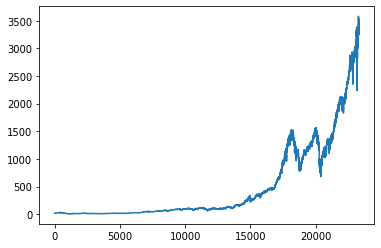

In [220]:
# Un solo argumento:
plt.plot(df_sp500['Close'])

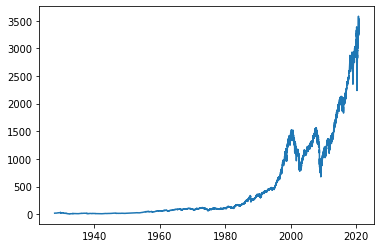

In [221]:
# Dos argumentos: x, y
plt.plot(df_sp500['Date'], df_sp500['Close'])

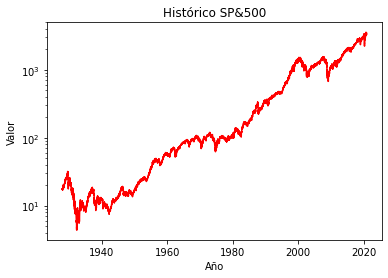

In [222]:
# Añadimos detalles
plt.plot(df_sp500['Date'], df_sp500['Close'], color='red')
plt.title('Histórico SP&500')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.yscale('log')
plt.show()

### 020101 EJEMPLO: Evolución Covid
Visualiza la evolución de casos acumulados de los países que contiene el dataframe.

Veamos varias visualizaciones útiles:

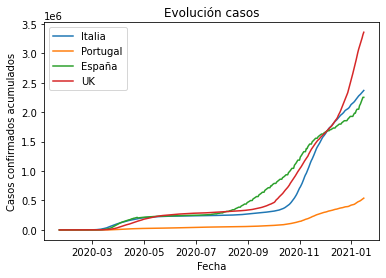

In [223]:
# Simplemente se añaden
plt.plot(df_covid['Date'], df_covid['Italy'], label='Italia')
plt.plot(df_covid['Date'], df_covid['Portugal'], label='Portugal')
plt.plot(df_covid['Date'], df_covid['Spain'], label='España')
plt.plot(df_covid['Date'], df_covid['UK'], label='UK')
plt.title('Evolución casos')
plt.xlabel('Fecha')
plt.ylabel('Casos confirmados acumulados')
plt.legend()
plt.show()

In [224]:
df_covid.columns

Index(['Date', 'France', 'Germany', 'Italy', 'Portugal', 'Spain', 'US', 'UK',
       'China', 'France_REL', 'Germany_REL', 'Italy_REL', 'Portugal_REL',
       'Spain_REL', 'US_REL', 'UK_REL', 'China_REL', 'France_ult7',
       'Germany_ult7', 'Italy_ult7', 'Portugal_ult7', 'Spain_ult7', 'US_ult7',
       'UK_ult7', 'China_ult7', 'France_REL_ult7', 'Germany_REL_ult7',
       'Italy_REL_ult7', 'Portugal_REL_ult7', 'Spain_REL_ult7', 'US_REL_ult7',
       'UK_REL_ult7', 'China_REL_ult7'],
      dtype='object')

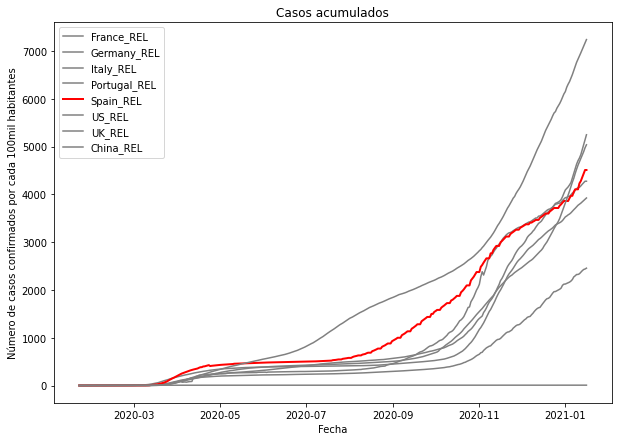

In [225]:
# En un loop
plt.figure(figsize=(10, 7))
for pais in ['France_REL', 'Germany_REL', 'Italy_REL', 'Portugal_REL', 'Spain_REL', 'US_REL', 'UK_REL', 'China_REL']:
  if pais == 'Spain_REL':
    plt.plot(df_covid['Date'], df_covid[pais], label=pais, linewidth=2, color='red')
  else:
    plt.plot(df_covid['Date'], df_covid[pais], label=pais, color='grey')
  plt.legend()
plt.title('Casos acumulados')
plt.xlabel('Fecha')
plt.ylabel('Número de casos confirmados por cada 100mil habitantes')
plt.show()

### 020102 EJERCICIO: Evolución Covid II
Muestra el número de casos en los últimos 7 días por cada 100.000 habitantes.

Muestra a China en azul, España en rojo y con anchura de 3, a US en negro, y el resto de países en gris.


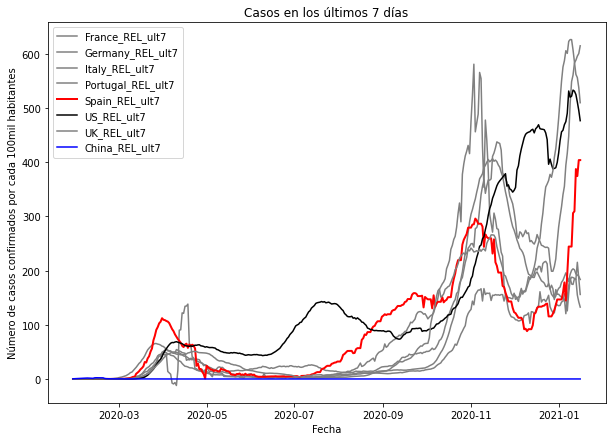

In [226]:
# En un loop
plt.figure(figsize=(10, 7))
for pais in ['France_REL_ult7', 'Germany_REL_ult7', 'Italy_REL_ult7', 'Portugal_REL_ult7', 
             'Spain_REL_ult7', 'US_REL_ult7', 'UK_REL_ult7', 'China_REL_ult7']:
  if pais == 'Spain_REL_ult7':
    plt.plot(df_covid['Date'], df_covid[pais], linewidth=2, label=pais, color='red')
  elif pais == 'China_REL_ult7':
    plt.plot(df_covid['Date'], df_covid[pais], label=pais, color='blue')
  elif pais == 'US_REL_ult7':
    plt.plot(df_covid['Date'], df_covid[pais], label=pais, color='black')
  else:
    plt.plot(df_covid['Date'], df_covid[pais], label=pais, color='grey')
  plt.legend()
plt.title('Casos en los últimos 7 días')
plt.xlabel('Fecha')
plt.ylabel('Número de casos confirmados por cada 100mil habitantes')
plt.show()

## 0202 plt.bar()
plt.[bar()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html) es la función de Pyplot para visualizar barras.

plt.[barh()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.barh.html#matplotlib.pyplot.barh) hace lo mismo pero con barras horizontales.



In [227]:
cols = ['France_REL', 'Germany_REL', 'Italy_REL', 'Portugal_REL', 'Spain_REL', 'US_REL', 'UK_REL', 'China_REL']

ult_fila = df_covid.index[-1]

valores = df_covid.loc[ult_fila, cols].values

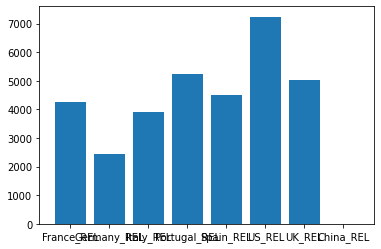

In [228]:
# Básico
plt.bar(x=cols, height=valores)
plt.show()

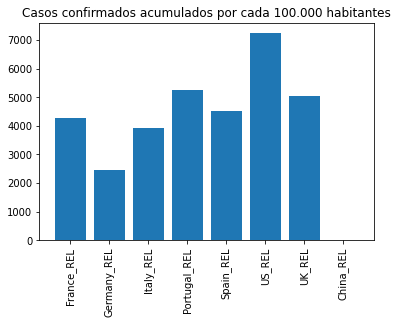

In [229]:
# Retoques
plt.bar(x=cols, height=valores)
plt.title('Casos confirmados acumulados por cada 100.000 habitantes')
plt.xticks(rotation=90)
plt.show()

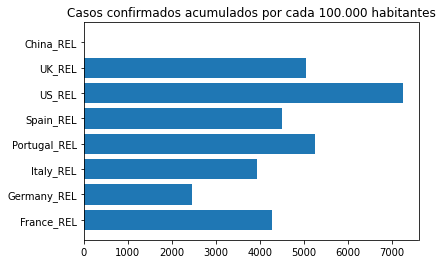

In [230]:
# En horizontal
plt.barh(y=cols, width=valores)
plt.title('Casos confirmados acumulados por cada 100.000 habitantes')
plt.show()

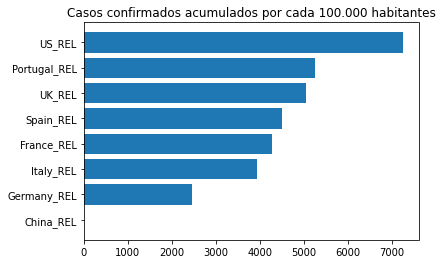

In [231]:
# Ordenado
serie_paises = pd.Series(data=valores, index=cols)
serie_paises = serie_paises.sort_values()

plt.barh(y=serie_paises.index, width=serie_paises.values)
plt.title('Casos confirmados acumulados por cada 100.000 habitantes')
plt.show()

### 020201 EJEMPLO: Jugadores diestros/zurdos
Los gráficos de barras suelen ser una muy buena idea para mostrar la distribución de variables categóricas.

Volviendo a nuestro dataset del fifa 19. Vamos a mostrar en un gráfico de barras cuántos jugadores diestros y zurdos hay.

La función value_counts() será muy útil.

In [234]:
# Recordemos lo que devuelve la función value_counts() aplicada sobre una serie
df_fifa19['Preferred Foot'].value_counts()

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64

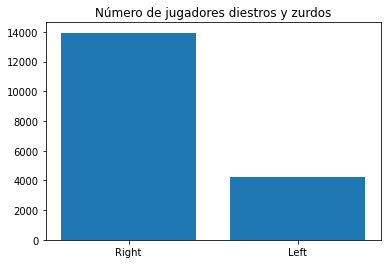

In [241]:
# Guardamos el resultado del value_counts(), que es un objeto serie
serie_pie_dominante = df_fifa19['Preferred Foot'].value_counts()

# Gráfico de barras
plt.bar(x=serie_pie_dominante.index, height=serie_pie_dominante.values)
plt.title('Número de jugadores diestros y zurdos')
plt.show()

#### Nota: Gráfico de tarta
Este es un buen ejemplo de un análisis en donde un gráfico de tarta no sería una mala opción. Las categorías zurdo/diestro son solo dos, son parte de un todo (jugadores totales) y es interesante saber cuál de las dos es mayoría.

En pyplot, el gráfico de tarta se realiza con plt.[pie](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html).

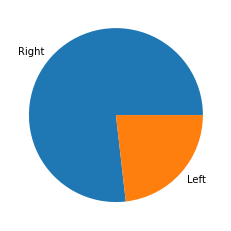

In [242]:
# Gráfico de tarta
plt.pie(serie_pie_dominante.values, labels=serie_pie_dominante.index)
plt.show()

### 020202 EJERCICIO: Jugadores por nacionalidad
Muestra en un gráfico de barras horizontales el número de jugadores por nacionalidad de las 10 nacionalidades más representadas, ordenados de mayor a menor.

In [245]:
# Guardamos los 10 primeros resultados del value_counts()
serie_nacionalidad = df_fifa19['Nationality'].value_counts()[:10]
serie_nacionalidad

England        1657
Germany        1195
Spain          1071
Argentina       936
France          911
Brazil          825
Italy           699
Colombia        616
Japan           478
Netherlands     452
Name: Nationality, dtype: int64

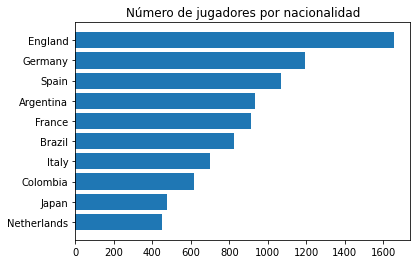

In [249]:
# Visualizamos el resultado
plt.barh(y=serie_nacionalidad.index[::-1], width=serie_nacionalidad.values[::-1])
plt.title('Número de jugadores por nacionalidad')
plt.show()

## 0203 plt.scatter()
Con plt.[scatter](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html) se realizan diagramas de dispersión (scatter plots).

In [250]:
df_fifa19.head(2)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Weight_kg,Value_€,Wage_€,Release Clause_€,Height_cm
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,72.121128,110500000.0,565000.0,226500000.0,170.18
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,83.007336,77000000.0,405000.0,127100000.0,187.96


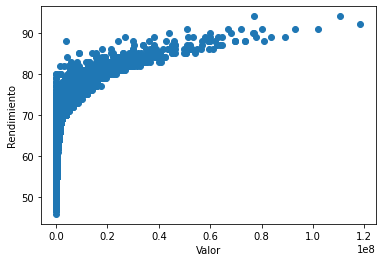

In [259]:
# Veamos la asociación entre valor y rendimiento
plt.scatter(df_fifa19['Value_€'],df_fifa19['Overall'])
plt.xlabel('Valor')
plt.ylabel('Rendimiento')
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


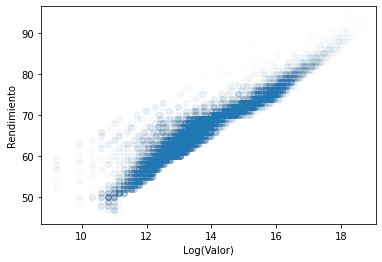

In [262]:
# alpha nos permite ver densidades
plt.scatter(np.log(df_fifa19['Value_€']), 
            df_fifa19['Overall'],
            alpha=0.01)
plt.xlabel('Log(Valor)')
plt.ylabel('Rendimiento')
plt.show()

El diagrama de dispersión de arriba muestra una clara asociación entre las variables valor y rendimiento. En este caso, parece claro que esto es porque el rendimiento influye directamente sobre el valor del jugador.

Pero hay otras razones por las que dos variables podrían estar correlacionadas sin que una cause a la otra. Hablaremos de esto en la próxima clase.

Volviendo a la asociación, esta es la pinta de dos variables que no tienen una gran asociación entre ellas:

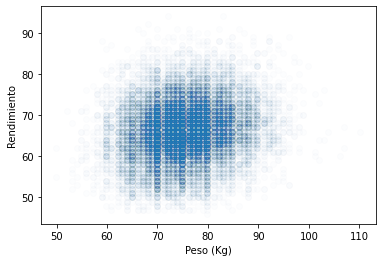

In [264]:
# el peso (entre atletas en su peso ideal) y el rendimiento no debería estar muy asociado
plt.scatter(df_fifa19['Weight_kg'], 
            df_fifa19['Overall'],
            alpha=0.01)
plt.xlabel('Peso (Kg)')
plt.ylabel('Rendimiento')
plt.show()

### 020301 EJERCICIO: Asociación edad/rendimiento
Muestra la asociación entre las variables edad (x) y rendimiento (y). Primero hazlo para todos los jugadores.

Luego, intenta un nuevo gráfico donde superpongas dos diagramas de dispersión: el primero, de nuevo, incluyendo todos los jugadores; el segundo, en naranja, se centrará en los jugadores españoles.

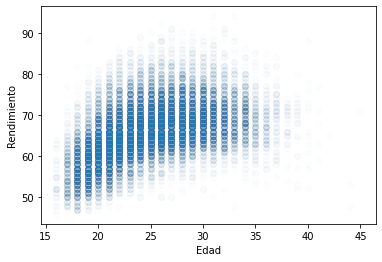

In [293]:
# Primero visualiza simplemente la asociación entre las dos variables
# diagrama de dispersión
plt.scatter(df_fifa19['Age'], df_fifa19['Overall'], alpha=0.01)
plt.xlabel('Edad')
plt.ylabel('Rendimiento')
plt.show()

In [294]:
# filtro jugadores españoles
filtro_españoles = df_fifa19['Nationality']=='Spain'

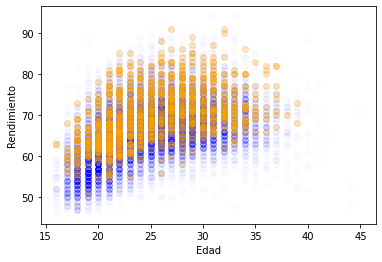

In [295]:
# diagrama de dispersión mundo vs España
plt.scatter(df_fifa19['Age'], df_fifa19['Overall'], alpha=0.01, color='blue')
plt.scatter(df_fifa19.loc[filtro_españoles, 'Age'], 
            df_fifa19.loc[filtro_españoles, 'Overall'], 
            alpha=0.25, color='orange')
plt.xlabel('Edad')
plt.ylabel('Rendimiento')
plt.show()

# 03 Basic checks
Una vez se han importado los datos, empezamos realizando comprobaciones básicas: tamaño de la tabla, columnas presentes, etc.

El método dataframe.[info()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) es muy útil para esto.

In [ ]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23323 entries, 0 to 23322
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       23323 non-null  object 
 1   Open       23323 non-null  float64
 2   High       23323 non-null  float64
 3   Low        23323 non-null  float64
 4   Close      23323 non-null  float64
 5   Adj Close  23323 non-null  float64
 6   Volume     23323 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.2+ MB


## 0301 Vista previa
Una buena primera comprobación suele ser visualizar la tabla. 

Aquí son muy útiles los métodos dataframe.[head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) y dataframe.[tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html).

In [ ]:
df_sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [ ]:
df_sp500.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.66,17.66,17.66,17.66,17.66,0
1,1928-01-03,17.76,17.76,17.76,17.76,17.76,0


In [ ]:
df_sp500.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
23318,2020-10-29,3277.169922,3341.050049,3259.820068,3310.110107,3310.110107,4903070000
23319,2020-10-30,3293.590088,3304.929932,3233.939941,3269.959961,3269.959961,4840450000
23320,2020-11-02,3296.199951,3330.139893,3279.739990,3310.239990,3310.239990,4310590000
23321,2020-11-03,3336.250000,3389.489990,3336.250000,3369.159912,3369.159912,4220070000
23322,2020-11-04,3406.459961,3486.250000,3405.169922,3443.439941,3443.439941,4783040000


### iloc[filas,columnas]
Filtra el dataframe para quedarse con datos concretos utilizando indices.

In [ ]:
df_sp500.iloc[1:3]

,Date,Open,High,Low,Close,Adj Close,Volume
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0


In [ ]:
df_sp500.iloc[-5:,:5]

,Date,Open,High,Low,Close
23318,2020-10-29,3277.169922,3341.050049,3259.820068,3310.110107
23319,2020-10-30,3293.590088,3304.929932,3233.939941,3269.959961
23320,2020-11-02,3296.199951,3330.139893,3279.739990,3310.239990
23321,2020-11-03,3336.250000,3389.489990,3336.250000,3369.159912
23322,2020-11-04,3406.459961,3486.250000,3405.169922,3443.439941


### loc[filas,columnas]
Filtra el dataframe para quedarse con datos concretos utilizando valores.

In [ ]:
df_sp500.loc[2:5, ['Date','Open','Close']]

,Date,Open,Close
2,1928-01-04,17.719999,17.719999
3,1928-01-05,17.549999,17.549999
4,1928-01-06,17.660000,17.660000
5,1928-01-09,17.500000,17.500000


In [ ]:
# Admite filtros!
filtro_posterior_2018 = df_sp500['Date'] > '2018-12-31'
filtro_posterior_2018

0        False
1        False
2        False
3        False
4        False
         ...  
23318     True
23319     True
23320     True
23321     True
23322     True
Name: Date, Length: 23323, dtype: bool

In [ ]:
df_sp500.loc[filtro_posterior_2018, ['Date','Open','Close']]

,Date,Open,Close
22857,2019-01-02,2476.959961,2510.030029
22858,2019-01-03,2491.919922,2447.889893
22859,2019-01-04,2474.330078,2531.939941
22860,2019-01-07,2535.610107,2549.689941
22861,2019-01-08,2568.110107,2574.409912
...,...,...,...
23318,2020-10-29,3277.169922,3310.110107
23319,2020-10-30,3293.590088,3269.959961
23320,2020-11-02,3296.199951,3310.239990
23321,2020-11-03,3336.250000,3369.159912


## 0302 Tamaño
El tamaño de las tablas se puede comprobar con dataframe.[shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html), que devuelve un tupple (filas, columnas).

In [25]:
df_covid.shape

(272, 362)

In [26]:
# filas
df_covid.shape[0]

272

In [27]:
# filas
len(df_covid)

272

In [28]:
# columnas
df_covid.shape[1]

362

In [29]:
df_sp500.shape

(23323, 7)

In [30]:
df_fifa19.shape

(18207, 89)

In [31]:
df_aire.shape

(844223, 4)

## 0303 Tipos de datos
Qué tipos de datos contiene nuestro dataframe?

In [ ]:
df_fifa19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [ ]:
df_fifa19.head(2)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


In [ ]:
type(df_fifa19)

pandas.core.frame.DataFrame

In [ ]:
type(df_fifa19['ID'])

pandas.core.series.Series

In [ ]:
type(df_fifa19['ID'][0])

numpy.int64

In [ ]:
type(df_fifa19['Name'][0])

str

## 0304 Variables
El método dataframe.[columns](https://www.google.com/search?q=dataframe+columns&oq=dataframe+columns&aqs=chrome..69i57j0l5.5054j0j4&sourceid=chrome&ie=UTF-8) devuelve las columnas de nuestra tabla en orden. Es útil en lugar del método info() cuando tenemos muchas columnas, o para realizar operaciones con ellas. 

In [ ]:
df_fifa19.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

## 0305 EJEMPLO 4: Comprobaciones básicas
Hagamos las comprobaciones básicas del dataframe sobre la calidad del aire de Madrid:


*   Número de filas y columnas
*   Nombre de las columnas
*   Tipos de dato de cada columna
*   Vista previa de los primeros y últimos valores

In [ ]:
# info()
df_aire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844223 entries, 0 to 844222
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   estacion  844223 non-null  int64  
 1   fecha     844223 non-null  object 
 2   magnitud  844223 non-null  int64  
 3   nivel     814437 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 25.8+ MB


In [ ]:
# Vista previas
display(df_aire.head())
display(df_aire.tail())

,estacion,fecha,magnitud,nivel
0,4,2001-1-1,1,17.0
1,4,2001-1-2,1,15.0
2,4,2001-1-3,1,15.0
3,4,2001-1-4,1,15.0
4,4,2001-1-5,1,16.0


,estacion,fecha,magnitud,nivel
844218,60,2020-3-27,14,89.0
844219,60,2020-3-28,14,76.0
844220,60,2020-3-29,14,76.0
844221,60,2020-3-30,14,82.0
844222,60,2020-3-31,14,64.0


# 04 Limpieza de Nulos
Los nulos son habituales y un poco molestos. Constituyen una pérdida de información y pueden impedir ciertos cálculos.

Es importante detectarlos y, cuando sea posible, corregirlos.

## 0401 Nulos por variable
Podemos ver el número de nulos por variable.

Dataframe[.isna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html) es un método muy útil.

In [ ]:
# Método isna()
df_fifa19.isna().head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_fifa19.isna().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [ ]:
pd.DataFrame(df_fifa19.isna().sum())

,0
Unnamed: 0,0
ID,0
Name,0
Age,0
Photo,0
...,...
GKHandling,48
GKKicking,48
GKPositioning,48
GKReflexes,48


### 040101 EJEMPLO 5: Función buscadora de nulos
vamos a crear una función que, dado un dataframe, muestra una tabla con el número de nulos por variable ordenado de mayor a menor.

In [ ]:
def contador_nulos(df):
  """
  Función que devuelve un dataframe indicando el número de nulos en cada
  variables. 
  """
  df_nulos = pd.DataFrame(df.isna().sum())
  df_nulos.columns = ['# Nulos']
  return df_nulos.sort_values('# Nulos', ascending=False)

In [ ]:
contador_nulos(df_covid)

,# Nulos
Province/State,188
Lat,1
Long,1
9/10/20,0
9/19/20,0
...,...
5/15/20,0
5/14/20,0
5/13/20,0
5/12/20,0


In [ ]:
contador_nulos(df_sp500)

,# Nulos
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
df_contador = contador_nulos(df_fifa19)
df_contador.head()

,# Nulos
Loaned From,16943
LWB,2085
LCM,2085
RS,2085
LW,2085


## 0402 Explorar Nulos
Cuando sea posible es recomendable entender la causa de los nulos. Hay algún patrón que se repite entre los nulos?

In [ ]:
# La columna 'Lat' solo tenía un nulo, podemos entender por qué?
filtro_lat_nulo = df_covid['Lat'].isna()
df_covid.loc[filtro_lat_nulo, ['Province/State', 'Country/Region', 'Lat', 'Long']]

,Province/State,Country/Region,Lat,Long
52,Repatriated Travellers,Canada,NaN,NaN


### EJEMPLO 6: Entender nulos en 'Province/State'
En esta columna hay muchos nulos: 188. Para entender cuándo están presentes, vamos a qué paises pertenencen y a cuáles no.

In [ ]:
filtro_col_nulos = df_covid['Province/State'].isna()
filtro_col_nulos

0      True
1      True
2      True
3      True
4      True
       ... 
267    True
268    True
269    True
270    True
271    True
Name: Province/State, Length: 272, dtype: bool

In [ ]:
filtro_col_no_nulos = df_covid['Province/State'].isna()==False
filtro_col_no_nulos

0      False
1      False
2      False
3      False
4      False
       ...  
267    False
268    False
269    False
270    False
271    False
Name: Province/State, Length: 272, dtype: bool

In [ ]:
df_covid.loc[filtro_col_nulos, 'Country/Region']

0             Afghanistan
1                 Albania
2                 Algeria
3                 Andorra
4                  Angola
              ...        
267               Vietnam
268    West Bank and Gaza
269                 Yemen
270                Zambia
271              Zimbabwe
Name: Country/Region, Length: 188, dtype: object

In [ ]:
paises_provincia_nulos = df_covid.loc[filtro_col_nulos, 'Country/Region'].unique()
paises_provincia_nulos

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Central African Republic', 'Chad',
       'Chile', 'Colombia', 'Comoros', 'Congo (Brazzaville)',
       'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 

In [ ]:
paises_provincia_no_nulos = df_covid.loc[filtro_col_no_nulos, 'Country/Region'].unique()
paises_provincia_no_nulos

array(['Australia', 'Canada', 'China', 'Denmark', 'France', 'Netherlands',
       'United Kingdom'], dtype=object)

## 0403 Tratamiento de Nulos
Una vez hemos detectado los nulos presentes en la tabla podemos corregirlos de varias formas.

### 040301 Prescindir de Nulos
Si tenemos pocas filas con nulos y consideramos que no son muy decisivas, podemos prescindir de dichas filas con el método dataframe.[dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html).

In [ ]:
# Tamaño del dataframe original
df_covid.shape

(272, 358)

In [ ]:
# Eliminamos filas con nulos en la columna 'Lat'
df_covid_drop_null_lat = df_covid.dropna(subset=['Lat'])
df_covid_drop_null_lat.shape

(271, 358)

#### 04030101 EJEMPLO 7: Eliminar filas
En el dataframe de jugadores del Fifa, si hay ciertas filas con con gran presencia de nulos y éstas no suponen un número significativo para el total, podemos eliminarlas.

In [ ]:
df_fifa19.shape

(18207, 89)

In [ ]:
# Parece que hay 48 jugadores de los que no tenemos datos. Son poquitos 
# (comparado con el total de 18207) así que podemos prescindir de ellos
df_contador.head(50)

,# Nulos
Loaned From,16943
LWB,2085
LCM,2085
RS,2085
LW,2085
LF,2085
CF,2085
RF,2085
RW,2085
LAM,2085


In [ ]:
# Eliminamos aquellas filas que no tienen informado el peso del jugardor
df_fifa19.dropna(axis=0, subset=['Weight'], inplace=True)
df_contador = contador_nulos(df_fifa19)
df_contador.head(50)

,# Nulos
Loaned From,16895
LWB,2037
LCM,2037
RS,2037
LW,2037
LF,2037
CF,2037
RF,2037
RW,2037
LAM,2037


In [ ]:
df_fifa19.shape

(18159, 89)

### 040302 Rellenar Nulos con Valores
Podemos sustituir los nulos con valores concretos: 0, la media o mediana, etc.

Para esto podemos utilizar el método dataframe.[fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna).

In [ ]:
df_contador = contador_nulos(df_fifa19)
df_contador.head(50)

,# Nulos
Loaned From,16895
LWB,2037
LCM,2037
RS,2037
LW,2037
LF,2037
CF,2037
RF,2037
RW,2037
LAM,2037


In [ ]:
# Nulos en columna 'Club'
df_fifa19['Club'] = df_fifa19['Club'].fillna('Unknown')

In [ ]:
# Nulos en columna 'Jersey Number'
mediana_dorsal = df_fifa19['Jersey Number'].median()
df_fifa19['Jersey Number'] = df_fifa19['Jersey Number'].fillna(mediana_dorsal)

# 05 Limpieza de datos
Es habitual que algunos de los datos se encuentren en formatos no apropiados.


## 0501 Limpieza de Formatos
A veces los datos se encuentran en formatos no adecuados. Un formato correspondiente con el tipo de dato permitirá realizar ciertas operaciones con mayor facilidad.

Para esto nos serán de utilidad los métodos:

*   [astype()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)
*   [to_datetime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)

In [ ]:
df_sp500.loc[:5,'Date']

0    1927-12-30
1    1928-01-03
2    1928-01-04
3    1928-01-05
4    1928-01-06
5    1928-01-09
Name: Date, dtype: object

In [ ]:
df_sp500.loc[:5,'Date'][0]

'1927-12-30'

In [ ]:
type(df_sp500.loc[:5,'Date'][0])

str

In [ ]:
# Cambiamos el formato de la columna 'Date'
df_sp500['Date'] = pd.to_datetime(
    df_sp500['Date'], format='%Y-%m-%d', errors='ignore')

## 0502 Eliminación de variables
Se pueden eliminar columnas o filas no necesarias con el método dataframe.[drop()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).

In [ ]:
df_fifa19.head(3)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


In [ ]:
df_fifa19.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [ ]:
cols_to_drop = ['Unnamed: 0', 'ID', 'Photo', 'Flag', 'Club Logo', 
                'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 
                'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 
                'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']

df_fifa19_clean = df_fifa19.drop(cols_to_drop, axis=1)

In [ ]:
df_fifa19.shape, df_fifa19_clean.shape

((18159, 89), (18159, 58))

# 06 Transformación de variables
A veces querremos crear nuevas variables o modificar variables existentes de manera un poco más personalizada/compleja que lo visto hasta ahora. Cómo lo hacemos?

Para cambiar los valores en una columna debemos tratar de evitar iterar sobre las filas del dataframe. Son procesos lentos que llevarán mucho tiempo para dataframes grandes. El orden (atendiendo a la eficiencia computacional) en que debemos intentar las operaciones es:



1.   Vectorización
2.   List comprehensions
3.   Dataframe.[apply()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)
4.   Dataframe.[itertuples()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.itertuples.html), dataframe.[iteritems()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iteritems.html#pandas.DataFrame.iteritems), dataframe.[iterrows()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html#pandas.DataFrame.iterrows)



## 0601 Iteracion
Aunque sea el menos eficiente, iterar sobre el dataframe es lo más sencillo conceptualmente. Veamos cómo podemos modificar una variable así.

In [ ]:
for index, row in df_fifa19_clean.head(1).iterrows():
  print('Index: ', index)
  print('Row: ', row)

Index:  0
Row:  Name                              L. Messi
Age                                     31
Nationality                      Argentina
Overall                                 94
Potential                               94
Club                          FC Barcelona
Value                              €110.5M
Wage                                 €565K
Special                               2202
Preferred Foot                        Left
International Reputation                 5
Weak Foot                                4
Skill Moves                              4
Work Rate                   Medium/ Medium
Body Type                            Messi
Real Face                              Yes
Position                                RF
Jersey Number                           10
Joined                         Jul 1, 2004
Loaned From                            NaN
Contract Valid Until                  2021
Height                                 5'7
Weight                              15

In [ ]:
for index, row in df_fifa19_clean.head(1).iterrows():
  print('Index: ', index)
  print('Peso: ', row['Weight'])

Index:  0
Peso:  159lbs


In [ ]:
%%timeit 
for index, row in df_fifa19_clean.iterrows():
  
  # Si el string contine 'lbs' al final del mismo
  if row['Weight'][-3:] == 'lbs':

    # Nos quedamos con la parte anterior (el peso) con formato numérico (float)
    peso_libras = float(row['Weight'][:-3])

    # Convertimos el peso en kgs
    peso_kgs = peso_libras*0.453592

    # Populamos la columna
    df_fifa19_clean.loc[index, 'Weight_kg'] = peso_kgs
  
  else:
    # Si no contenía 'lbs' al final, lo dejamos como nulo
    df_fifa19_clean.loc[index, 'Weight_kg'] = np.NaN

1 loop, best of 3: 8.32 s per loop


In [ ]:
df_fifa19_clean.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Weight_kg
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,72.121128
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,83.007336
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,68.038800
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,76.203456
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,69.853168


In [ ]:
df_fifa19_clean['Weight_kg'].isna().sum()

0

## 0602 Dataframe.apply()
La siguiente opción en eficiencia es utilizar el método [.apply()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html). Más información sobre [cómo crear funciones para aplicar sobre un dataframe con .apply()](https://queirozf.com/entries/pandas-dataframes-apply-examples).

Veamos cómo podemos modificar una variable así.

In [ ]:
def limpiar_peso(valor_original):
  """
  Función que limpia la columna Weight al convertirla en formato númerico
  y definir los valores en Kg
  """
  # Si el string contine 'lbs' al final del mismo
  if valor_original[-3:] == 'lbs':

    # Nos quedamos con la parte anterior (el peso) con formato numérico (float)
    peso_libras = float(valor_original[:-3])

    # Convertimos el peso en kgs
    peso_kgs = peso_libras*0.453592
  
  else:
    # Si no contenía 'lbs' al final, lo dejamos como nulo
    peso_kgs = np.NaN
  
  return peso_kgs

In [ ]:
%%timeit 
df_fifa19_clean['Weight_kg'] = df_fifa19_clean['Weight'].apply(limpiar_peso)

100 loops, best of 3: 9.87 ms per loop


In [ ]:
df_fifa19_clean.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Weight_kg
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,72.121128
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,83.007336
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,68.038800
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,76.203456
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,69.853168


## 0603 List Comprehensions
Método conciso y eficiente de crear listas. [Info extra sobre cuándo y por qué usar list comprehensions.](https://realpython.com/list-comprehension-python/#benefits-of-using-list-comprehensions) 

Las list comprehensions utilizan la sintaxis: 
*   [expression for item in list]

O si incluímos condiciones:

*   [expression if condicion else expresion for item in list]

Veamos cómo podemos modificar una variable utilizando list comprehensions.

In [ ]:
# [expresion for item in list]

In [ ]:
[x for x in df_fifa19_clean['Weight']][:5]

['159lbs', '183lbs', '150lbs', '168lbs', '154lbs']

In [ ]:
[x[:-3] for x in df_fifa19_clean['Weight']][:5]

['159', '183', '150', '168', '154']

In [ ]:
[float(x[:-3]) for x in df_fifa19_clean['Weight']][:5]

[159.0, 183.0, 150.0, 168.0, 154.0]

In [ ]:
[float(x[:-3])*0.453592 for x in df_fifa19_clean['Weight']][:5]

[72.121128, 83.007336, 68.0388, 76.203456, 69.853168]

In [ ]:
[float(x[:-3])*0.453592 if x[-3:]=='lbs' else np.NaN for x in df_fifa19_clean['Weight']][:5]

[72.121128, 83.007336, 68.0388, 76.203456, 69.853168]

In [ ]:
%%timeit 
df_fifa19_clean['Weight_kg'] = [float(x[:-3])*0.453592 if x[-3:]=='lbs' else np.NaN for x in df_fifa19_clean['Weight']]

100 loops, best of 3: 9.75 ms per loop


In [ ]:
df_fifa19_clean.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Weight_kg
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,72.121128
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,83.007336
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,68.038800
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,76.203456
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,69.853168


## 0604 Vectorización
Consiste en realizar operaciones con vectores en la medida de lo posible en lugar de elemento por elemento. [Más información sobre vectorización aquí](https://stackoverflow.com/questions/1422149/what-is-vectorization).

In [ ]:
# Vectorizamos la función que habíamos creado
limpiar_peso_vectorizada = np.vectorize(limpiar_peso)

In [ ]:
%%timeit
df_fifa19_clean['Weight_kg'] = limpiar_peso_vectorizada(np.array(df_fifa19_clean['Weight']))

100 loops, best of 3: 8.81 ms per loop


In [ ]:
df_fifa19_clean.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Weight_kg
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,72.121128
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,83.007336
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,68.038800
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,76.203456
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,69.853168


## 0605 EJEMPLO 8: Limpieza de columnas con precios
Las columnas ['Value', 'Wage', 'Release Clasue'] continen valores monetarios en formatos un poco extraños: son strings, con el tipo de moneda antecediendo a la cifra, que contiene abreviaturas tipo M, K para indicar millones, miles, etc.

Limpiemos estas columnas utilizando las distintas formas que hemos aprendido:

### 060501 Exploramos las columnas
Para entender el formato.

In [ ]:
# Primero echamos un ojo a las columnas
df_fifa19_clean[['Value','Wage','Release Clause']].head()

,Value,Wage,Release Clause
0,€110.5M,€565K,€226.5M
1,€77M,€405K,€127.1M
2,€118.5M,€290K,€228.1M
3,€72M,€260K,€138.6M
4,€102M,€355K,€196.4M


In [ ]:
# Contienen nulos?
df_fifa19_clean[['Value','Wage','Release Clause']].isna().sum()

Value                0
Wage                 0
Release Clause    1516
dtype: int64

In [ ]:
# Release Clause sí tiene nulos: los rellenamos con un formato similar
df_fifa19_clean['Release Clause'] = df_fifa19_clean['Release Clause'].fillna('€0M')

In [ ]:
# Todos los valores empiezan por el string '€'?
for columna in ['Value','Wage','Release Clause']:
  lista_valores = [x[:1] for x in df_fifa19_clean[columna]]
  lista_sin_duplicados = list(set(lista_valores))
  print('En la columna ' + columna + ' los valores empiezan por ', lista_sin_duplicados)

En la columna Value los valores empiezan por  ['€']
En la columna Wage los valores empiezan por  ['€']
En la columna Release Clause los valores empiezan por  ['€']


In [ ]:
# Todos los valores acaban por el string 'M'?
for columna in ['Value','Wage','Release Clause']:
  lista_valores = [x[-1:] for x in df_fifa19_clean[columna]]
  lista_sin_duplicados = list(set(lista_valores))
  print('En la columna ' + columna + ' los valores acaban por ', lista_sin_duplicados)

En la columna Value los valores acaban por  ['K', 'M', '0']
En la columna Wage los valores acaban por  ['K', '0']
En la columna Release Clause los valores acaban por  ['K', 'M']


### 060502 Iteración
Usamos primero el menos eficiente de los métodos, la iteración sobre las filas del dataframe.

In [ ]:
for index, row in df_fifa19_clean.loc[:3,['Value','Wage','Release Clause']].iterrows():
  print(index)
  print(row)

0
Value             €110.5M
Wage                €565K
Release Clause    €226.5M
Name: 0, dtype: object
1
Value                €77M
Wage                €405K
Release Clause    €127.1M
Name: 1, dtype: object
2
Value             €118.5M
Wage                €290K
Release Clause    €228.1M
Name: 2, dtype: object
3
Value                €72M
Wage                €260K
Release Clause    €138.6M
Name: 3, dtype: object


In [ ]:
def limpieza_cols_dinero(valor_original):
  """
  Esta función convierte los valores originales de ['Value','Wage','Release Clause']
  en valores numéricos en €.
  """
  if valor_original[-1]=='M':
    valor_final = float(valor_original[1:-1])*1000000
  elif valor_original[-1]=='K':
    valor_final = float(valor_original[1:-1])*1000
  else:
    valor_final = float(valor_original[1:])
  
  return valor_final

In [ ]:
%%timeit 
for index, row in df_fifa19_clean.iterrows():
  
  for columna in ['Value','Wage','Release Clause']:
    valor_orig = row[columna]
    df_fifa19_clean.loc[index, columna+'_€'] = limpieza_cols_dinero(valor_orig)

1 loop, best of 3: 19.6 s per loop


### 060503 Dataframe.apply()

In [ ]:
%%timeit 
for columna in ['Value','Wage','Release Clause']:
  df_fifa19_clean[columna+'_€'] = df_fifa19_clean[columna].apply(limpieza_cols_dinero)

10 loops, best of 3: 29.2 ms per loop


### 060503 Vectorización

In [ ]:
limpieza_cols_dinero_vectorizada = np.vectorize(limpieza_cols_dinero)

In [ ]:
%%timeit 
for columna in ['Value','Wage','Release Clause']:
  df_fifa19_clean[columna+'_€'] = limpieza_cols_dinero_vectorizada(np.array(df_fifa19_clean[columna]))

10 loops, best of 3: 26.3 ms per loop


## 0606 EJERCICIO 2: Limpieza variable altura
La variable de altura de los jugadores: 'Height' está expresada en formato string y con pies y pulgadas como unidades. 

Crea la variable 'Height_cm' que contenga la altura de los jugadores en formato numérico (float) y con cm como unidades.

Para este ejercicio te vendrá bien la función [.split()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html).

In [ ]:
# Lee la documentación de la  función split() y prueba estas ejecuciones
string_de_prueba = 'izq.derecha'

display(string_de_prueba.split('.'))

display(string_de_prueba.split('.')[0])

display(string_de_prueba.split('.')[1])

['izq', 'derecha']

'izq'

'derecha'

In [ ]:
# Explora la columna, hay alguna que no contenga el separador "'"?
[x for x in df_fifa19_clean['Height'] if "'" not in x]

[]

In [ ]:
# Define la función que pasará al altura de un string de pies'pulgadas 
# al valor numérico (float) de la altura en cm

def limpieza_altura(altura_original):
  """
  A partir de un string con la altura en formato: pies'pulgadas 
  devuelve un float de la altura en cm.
  """
  pies = float(altura_original.split("'")[0])
  pulgadas = float(altura_original.split("'")[1])
  altura_cm = (12*pies+pulgadas)*2.54
  return altura_cm

In [ ]:
## Iteración
%%timeit
for index, row in df_fifa19_clean.iterrows():
  df_fifa19_clean.loc[index, 'Height_cm'] = limpieza_altura(row['Height'])

1 loop, best of 3: 8.24 s per loop


In [ ]:
## Datafrane.apply()
%%timeit
df_fifa19_clean['Height_cm'] = df_fifa19_clean['Height'].apply(limpieza_altura)

100 loops, best of 3: 17 ms per loop


In [ ]:
## Vectorización
limpieza_vectorizada = np.vectorize(limpieza_altura)

In [ ]:
%%timeit
df_fifa19_clean['Height_cm'] = limpieza_vectorizada(np.array(df_fifa19_clean['Height']))

100 loops, best of 3: 16.1 ms per loop


## 0607 Creación de nuevas variables
Además de los métodos de transformación que hemos visto, existen otros propios de las distintas clases que nos permiten también generar variables nuevas.

Por ejemplo, los métodos propios de los formatos de fechas:

### 060701 Métodos propios de timedate

In [ ]:
# Nueva variable año
df_sp500['Year'] = df_sp500['Date'].dt.year
df_sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0,1927
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,1928
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,1928
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,1928
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,1928


In [ ]:
# Nueva variable día de la semana
df_sp500['Day of Week'] = df_sp500['Date'].dt.dayofweek
df_sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Volatilidad Diaria,Movilidad Diaria Disponible,Day of Week
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0,1927,0.0,0,4
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,1928,0.0,0,1
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,1928,0.0,0,2
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,1928,0.0,0,3
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,1928,0.0,0,4


### 060702 Operaciones con columnas

In [ ]:
# Nueva variable volatilidad diaria
df_sp500['Volatilidad Diaria'] = (df_sp500['High']-df_sp500['Low'])/df_sp500['Close']
df_sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Volatilidad Diaria,Movilidad Diaria Disponible,Day of Week
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0,1927,0.0,0,4
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,1928,0.0,0,1
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,1928,0.0,0,2
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,1928,0.0,0,3
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,1928,0.0,0,4


In [ ]:
df_sp500.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Volatilidad Diaria,Movilidad Diaria Disponible,Day of Week
23318,2020-10-29,3277.169922,3341.050049,3259.820068,3310.110107,3310.110107,4903070000,2020,0.024540,1,3
23319,2020-10-30,3293.590088,3304.929932,3233.939941,3269.959961,3269.959961,4840450000,2020,0.021710,1,4
23320,2020-11-02,3296.199951,3330.139893,3279.739990,3310.239990,3310.239990,4310590000,2020,0.015225,1,0
23321,2020-11-03,3336.250000,3389.489990,3336.250000,3369.159912,3369.159912,4220070000,2020,0.015802,1,1
23322,2020-11-04,3406.459961,3486.250000,3405.169922,3443.439941,3443.439941,4783040000,2020,0.023546,1,2


### 060703 Variables dummy
Variables binarias que adoptan un 1 si se cumple cierta condición.

In [ ]:
filtro_movilidad_diaria_disponible = df_sp500['High'] != df_sp500['Low']
filtro_movilidad_diaria_disponible

0        False
1        False
2        False
3        False
4        False
         ...  
23318     True
23319     True
23320     True
23321     True
23322     True
Length: 23323, dtype: bool

In [ ]:
# Nueva variable movilidad diaria disponible
df_sp500['Dummy Movilidad'] = filtro_movilidad_diaria_disponible.astype(int)
df_sp500['Dummy Movilidad']

0        0
1        0
2        0
3        0
4        0
        ..
23318    1
23319    1
23320    1
23321    1
23322    1
Name: Dummy Movilidad, Length: 23323, dtype: int64

### 060704 Operaciones de ventana
A veces queremos realizar operaciones entre distintas filas. Por ejemplo:


*   Comparar un valor hoy con el correspondiente ayer (ver método [.shift()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html))
*   Calcular un estadístico respecto a los n últimos registros (ver método [.rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html))


In [ ]:
df_sp500['Close'][:3]

0    17.660000
1    17.760000
2    17.719999
Name: Close, dtype: float64

In [ ]:
df_sp500['Close'].shift(1)[:3]

0      NaN
1    17.66
2    17.76
Name: Close, dtype: float64

In [ ]:
# Variación respecto a ayer
df_sp500['Variacion'] = df_sp500['Close']/df_sp500['Close'].shift(1)

In [ ]:
df_sp500['Variacion'].head()

0         NaN
1    1.005663
2    0.997748
3    0.990406
4    1.006268
Name: Variacion, dtype: float64

In [ ]:
# Variación media ultimos n días
df_sp500['Variacion ult7'] = df_sp500['Variacion'].rolling(7).mean()

In [ ]:
# También podemos crear nuestra propia función
df_sp500['Variacion ac ult 250'] = df_sp500['Variacion'].rolling(7).agg(lambda x:x.prod())

In [ ]:
df_sp500.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Volatilidad Diaria,Movilidad Diaria Disponible,Day of Week,Dummy Movilidad,Variacion,Variacion ult7,Variacion ac ult 250
23318,2020-10-29,3277.169922,3341.050049,3259.820068,3310.110107,3310.110107,4903070000,2020,0.024540,1,3,1,1.011947,0.994502,0.961369
23319,2020-10-30,3293.590088,3304.929932,3233.939941,3269.959961,3269.959961,4840450000,2020,0.021710,1,4,1,0.987870,0.993083,0.951798
23320,2020-11-02,3296.199951,3330.139893,3279.739990,3310.239990,3310.239990,4310590000,2020,0.015225,1,0,1,1.012318,0.994097,0.958520
23321,2020-11-03,3336.250000,3389.489990,3336.250000,3369.159912,3369.159912,4220070000,2020,0.015802,1,1,1,1.017799,0.996147,0.972231
23322,2020-11-04,3406.459961,3486.250000,3405.169922,3443.439941,3443.439941,4783040000,2020,0.023546,1,2,1,1.022047,1.001953,1.012488


# 06 Distribución de variables
Hasta ahora hemos importado el dataset, nos hemos familiarizado con sus características principales, hemos identificado y limpiado los nulos y hemos transformado algunas variables para crear otras con más sentido.

Veamos ahora cuál es la [distribución](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) de cada variable.

## 0601 Variables numéricas
En cuanto a las variables de tipo numérico, el método dataframe.[describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) es muy útil para conocer sus estadísticos principales.

In [ ]:
df_fifa19_clean.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Weight_kg,Value_€,Wage_€,Release Clause_€,Height_cm
count,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,1.815900e+04,18159.000000,1.815900e+04,18159.000000
mean,25.122529,66.249904,71.319126,1597.903959,1.113222,2.947299,2.361308,19.544413,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,75.286805,2.416131e+06,9752.574481,4.202278e+06,181.257584
std,4.670568,6.914613,6.134420,272.862270,0.394031,0.660456,0.756164,15.942629,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119,7.073016,5.601319e+06,22024.397597,1.071975e+07,6.730145
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,49.895120,0.000000e+00,0.000000,0.000000e+00,154.940000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,69.853168,3.000000e+05,1000.000000,3.960000e+05,175.260000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,74.842680,6.750000e+05,3000.000000,1.000000e+06,180.340000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,79.832192,2.000000e+06,9000.000000,3.000000e+06,185.420000
max,45.000000,94.000000,95.00

## 0602 Variables categóricas
Aquellas que pueden adoptar valores finitos. Es muy útil el método dataframe[columna].[value_counts()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html).

In [ ]:
df_fifa19_clean['Nationality'].value_counts()

England                1657
Germany                1195
Spain                  1071
Argentina               936
France                  911
                       ... 
Qatar                     1
Lebanon                   1
Nicaragua                 1
São Tomé & Príncipe       1
Belize                    1
Name: Nationality, Length: 164, dtype: int64

In [ ]:
df_fifa19_clean['Preferred Foot'].value_counts()

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64

El método dataframe[columna].[unique()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html) puede resultar útil también.

In [ ]:
df_fifa19_clean['Nationality'].unique()

array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands',
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland', 'Guinea',
       'Montenegro', 'Armenia', 'Switzerland', 'Norway', 'Czech Republic',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Albania', 'Venezuela', 'Japan', 'Turkey', 'Ecuador', 'Paraguay',
       'Mali', 'Nigeria', 'Cameroon', 'Dominican Republic', 'Israel',
       'Kenya', 'Hungary', 'Republic of Ireland', 'Romania',
       'United States', 'Cape Verde', 'Australia', 'Peru', 'Togo',
       'Syria', 'Zimbabwe', 'Angola', 'Burkina Faso', 'Iran', 'Estonia',
       'Tunisia', 'Equato

In [ ]:
df_fifa19_clean.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Weight_kg,Value_€,Wage_€,Release Clause_€,Height_cm
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,72.121128,110500000.0,565000.0,226500000.0,170.18
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,83.007336,77000000.0,405000.0,127100000.0,187.96
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,68.038800,118500000.0,290000.0,228100000.0,175.26
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,76.203456,72000000.0,260000.0,138600000.0,193.04
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,69.853168,102000000.0,355000.0,196400000.0,180.34


## 0603 Distribuciones respecto a otras
A veces nos interesa entender la distribución de una variable respecto a otra. Para esto suele ser muy útil la operación [groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html).

Por ejemplo, son mejores los zurdos de media? Es verdad que los jugadores españoles tienden a ser pequeñitos comparados con otras nacionalidades?

In [ ]:
# Son de media mejores los zurdos?
df_fifa19_clean.groupby('Preferred Foot')['Overall'].mean().reset_index()

,Preferred Foot,Overall
0,Left,66.801472
1,Right,66.083381


In [ ]:
# Son de media mejores los zurdos?
df_fifa19_clean.groupby('Preferred Foot')['Overall'].quantile(.25).reset_index()

,Preferred Foot,Overall
0,Left,63.0
1,Right,62.0


In [ ]:
# Cuales son los paises con jugadores más grandes y pesados (y menos)?
df_fifa19_clean.groupby('Nationality')[['Height_cm','Weight_kg']].mean().reset_index().sort_values(['Height_cm','Weight_kg'], ascending=False).head(20)

,Nationality,Height_cm,Weight_kg
138,South Sudan,200.660000,84.821704
88,Kuwait,195.580000,73.028312
116,Oman,193.040000,92.986360
89,Latvia,190.500000,87.014065
27,Central African Rep.,187.960000,82.251349
90,Lebanon,187.960000,79.832192
64,Guatemala,187.960000,77.866627
102,Moldova,186.944000,77.292077
121,Philippines,186.690000,83.007336
52,Faroe Islands,186.266667,81.495363


In [ ]:
df_sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Volatilidad Diaria,Movilidad Diaria Disponible
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0,1927,0.0,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,1928,0.0,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,1928,0.0,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,1928,0.0,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,1928,0.0,0


In [ ]:
df_sp500.groupby('Year')['Close'].mean().reset_index()

,Year,Close
0,1927,17.660000
1,1928,19.937200
2,1929,26.123936
3,1930,21.033626
4,1931,13.631071
...,...,...
89,2016,2094.651264
90,2017,2449.076379
91,2018,2746.214183
92,2019,2913.356380


In [ ]:
df_aire.head()

,estacion,fecha,magnitud,nivel
0,4,2001-1-1,1,17.0
1,4,2001-1-2,1,15.0
2,4,2001-1-3,1,15.0
3,4,2001-1-4,1,15.0
4,4,2001-1-5,1,16.0


In [ ]:
df_aire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844223 entries, 0 to 844222
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   estacion  844223 non-null  int64  
 1   fecha     844223 non-null  object 
 2   magnitud  844223 non-null  int64  
 3   nivel     814437 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 25.8+ MB


In [ ]:
df_aire['estacion'].unique()

array([ 4,  8, 11, 16, 17, 18, 24, 35, 36, 38, 39, 40, 27, 57, 47, 54, 58,
       59, 49, 55, 56, 60, 50, 48])

In [ ]:
# Librería generada sobre matplotlib con algunas mejoras
import seaborn as sns

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     | 38.2MB 523kB/s
     |████████████████████████████████| 81kB 4.0MB/s 
     |████████████████████████████████| 604kB 23.5MB/s 
     |████████████████████████████████| 3.1MB 28.4MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
     |████████████████████████████████| 81kB 9.3MB/s 
     |████████████████████████████████| 296kB 45.2MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.10.0-py2.py3-none-any.whl size=239950 sha256=27a02c8d9ce5e6935207a0569156a9de6ad7f45f0b8df6659d865b6a4346026e
  Stored in directory: /tmp/pip-ephem-wheel-cache-wsz4g4tt/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=2149c2e25c70902519a068f6cd1a4854bf97ea4420329b139d1c6e095b669c49
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.0-cp36-none-any.whl size=599738 sha256=f

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df_sp500, title='Pandas Profiling Report', html={'style':{'full_width':False}})

In [ ]:
profile.to_notebook_iframe(<<)

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]